<a href="https://colab.research.google.com/github/Samrat-Abdul-Jalil/Detection-of-Autism-Spectrum-Disorder-Using-Machine-Learning-/blob/main/code/Detection_of_Autism_Spectrum_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/BI/csv_result-Autism-Child-Data.csv')

In [20]:
pd.set_option('display.max_column', None)
data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,1,Others,no,no,Jordan,no,5,4-11 years,Parent,0
1,2,1,1,0,0,1,1,0,1,0,0,6,1,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,0
2,3,1,1,0,0,0,1,1,1,0,0,6,1,?,no,no,Jordan,yes,5,4-11 years,?,0
3,4,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,no,4,4-11 years,?,0
4,5,1,1,1,1,1,1,1,1,1,1,5,1,Others,yes,no,United States,no,10,4-11 years,Parent,1


In [4]:
data.shape

(292, 22)

In [5]:
data['contry_of_res'].unique()

array(['Jordan', 'United States', 'Egypt', 'United Kingdom', 'Bahrain',
       'Austria', 'Kuwait', 'United Arab Emirates', 'Europe', 'Malta',
       'Bulgaria', 'South Africa', 'India', 'Afghanistan', 'Georgia',
       'New Zealand', 'Syria', 'Iraq', 'Australia', 'Saudi Arabia',
       'Armenia', 'Turkey', 'Pakistan', 'Canada', 'Oman', 'Brazil',
       'South Korea', 'Costa Rica', 'Sweden', 'Philippines', 'Malaysia',
       'Argentina', 'Japan', 'Bangladesh', 'Qatar', 'Ireland', 'Romania',
       'Netherlands', 'Lebanon', 'Germany', 'Latvia', 'Russia', 'Italy',
       'China', 'Nigeria', 'U.S. Outlying Islands', 'Nepal', 'Mexico',
       'Isle of Man', 'Libya', 'Ghana', 'Bhutan'], dtype=object)

In [6]:
data['contry_of_res'].unique().shape

(52,)

In [7]:
data['ethnicity'].unique()

array(['Others', 'Middle Eastern ', '?', 'White-European', 'Black',
       'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish',
       'Latino'], dtype=object)

In [8]:
data['Class/ASD'].unique()

array(['NO', 'YES'], dtype=object)

In [9]:
data['Class/ASD']=data['Class/ASD'].replace("YES",1)\
                                      .replace("NO",0)\
                                      
print(data['Class/ASD'])

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class/ASD, Length: 292, dtype: int64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='contry_of_res', ylabel='count'>

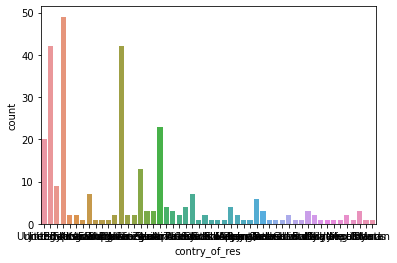

In [11]:
sns.countplot(data=data,x="contry_of_res")

<Axes: ylabel='Class/ASD'>

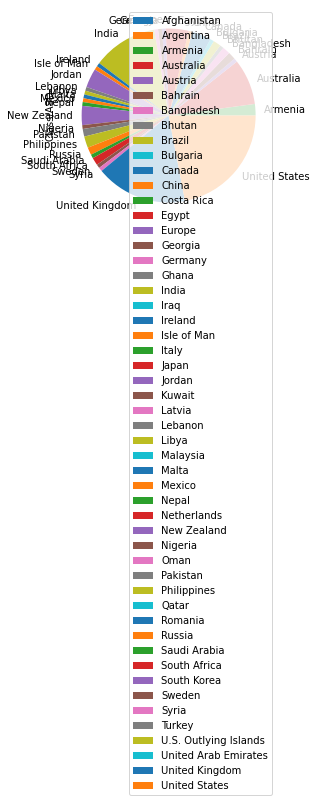

In [12]:
data.groupby(['contry_of_res']).sum().plot(kind='pie',y='Class/ASD')

<Axes: xlabel='ethnicity', ylabel='count'>

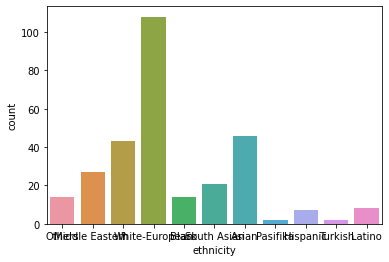

In [13]:
sns.countplot(data=data,x="ethnicity")

<Axes: ylabel='Class/ASD'>

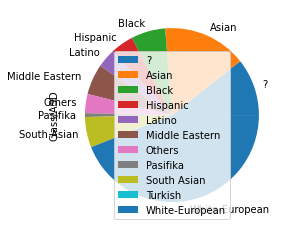

In [14]:
data.groupby(['ethnicity']).sum().plot(kind='pie',y='Class/ASD')

In [15]:
data['age_desc'].unique()

array(['4-11 years'], dtype=object)

In [ ]:
data['relation'].unique()

array(['Parent', '?', 'Self', 'Relative', 'Health care professional',
       'self'], dtype=object)

<Axes: xlabel='relation', ylabel='count'>

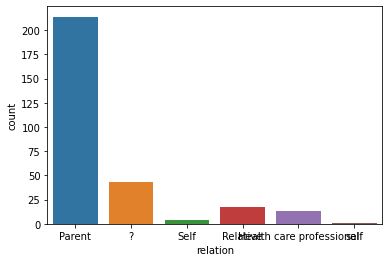

In [16]:
sns.countplot(data=data,x="relation")

<Axes: xlabel='used_app_before', ylabel='count'>

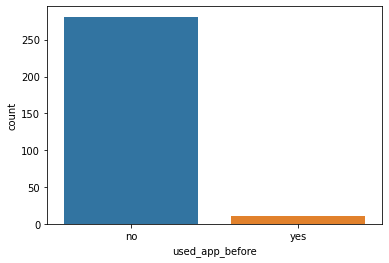

In [17]:
sns.countplot(data=data,x="used_app_before")

In [18]:
data['gender'].unique()

array(['m', 'f'], dtype=object)

In [ ]:
data['gender']=data['gender'].replace("m",1)\
                                      .replace("f",0)\
                                      
print(data['gender'])

In [ ]:
data['jundice']=data['jundice'].replace("yes",1)\
                                      .replace("no",0)\
                                      
print(data['jundice'])


In [ ]:
data['austim']=data['austim'].replace("yes",1)\
                                      .replace("no",0)\
                                      
print(data['austim'])

In [ ]:
data['relation']=data['relation'].replace("Parent",4)\
                                      .replace("?",0)\
                                      .replace("Self",1)\
                                      .replace("Relative",2)\
                                      .replace("Health care professional",3)\
                                      .replace("self",1)\
                                      
                                      
print(data['relation'])

In [28]:
data.drop(['ethnicity','contry_of_res','used_app_before','age_desc'],axis=1,inplace=True)

In [31]:
data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,6,1,0,0,5,4,0
1,2,1,1,0,0,1,1,0,1,0,0,6,1,0,0,5,4,0
2,3,1,1,0,0,0,1,1,1,0,0,6,1,0,0,5,0,0
3,4,0,1,0,0,1,1,0,0,0,1,5,0,1,0,4,0,0
4,5,1,1,1,1,1,1,1,1,1,1,5,1,1,0,10,4,1
